# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key



# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?q="
city_url = url + "hermanus" + "&appid=" + "1f9c17d16a470af4fb6a79820a606b09E" + "&units="+ "metric"
city_weather = []
city_weather = requests.get(city_url).json()
print (city_weather)

{'cod': 401, 'message': 'Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.'}


In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#define the unit to metric
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units="+ units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | opuwo
Processing Record 2 of Set 1 | sibut
Processing Record 3 of Set 1 | sonsorol village
City not found. Skipping...
Processing Record 4 of Set 1 | yulinshi
Processing Record 5 of Set 1 | bikenibeu village
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | necochea
Processing Record 8 of Set 1 | abashiri
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | talcahuano
Processing Record 11 of Set 1 | dolores
Processing Record 12 of Set 1 | karratha
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 16 of Set 1 | flekkefjord
Processing Record 17 of Set 1 | ladik
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | enewetak
Processing Record 20 of Set 1 | cable beach
City not found. Skipping...
Processing Record 

Processing Record 38 of Set 4 | polyarnyy
Processing Record 39 of Set 4 | vallenar
Processing Record 40 of Set 4 | ta`u
Processing Record 41 of Set 4 | lihue
Processing Record 42 of Set 4 | villa de arista
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | petropavlovsk-kamchatsky
Processing Record 45 of Set 4 | quellon
Processing Record 46 of Set 4 | ust-nera
Processing Record 47 of Set 4 | joshimath
Processing Record 48 of Set 4 | minas de marcona
Processing Record 49 of Set 4 | happy valley-goose bay
Processing Record 0 of Set 5 | jianshui
Processing Record 1 of Set 5 | menongue
Processing Record 2 of Set 5 | tsiolkovskiy
City not found. Skipping...
Processing Record 3 of Set 5 | luderitz
Processing Record 4 of Set 5 | thompson
Processing Record 5 of Set 5 | manaure
Processing Record 6 of Set 5 | nantucket
Processing Record 7 of Set 5 | nishinoomote
Processing Record 8 of Set 5 | pervomayskoye
Processing Record 9 of Set 5 | puerto baquerizo moreno
Processing R

Processing Record 29 of Set 8 | kidal
Processing Record 30 of Set 8 | novoishimskiy
Processing Record 31 of Set 8 | malumfashi
Processing Record 32 of Set 8 | kirensk
Processing Record 33 of Set 8 | taro
Processing Record 34 of Set 8 | caucete
Processing Record 35 of Set 8 | hargeysa
Processing Record 36 of Set 8 | kulia village
City not found. Skipping...
Processing Record 37 of Set 8 | merida
Processing Record 38 of Set 8 | san jose de las matas
Processing Record 39 of Set 8 | dalbandin
Processing Record 40 of Set 8 | nuuk
Processing Record 41 of Set 8 | grand falls-windsor
Processing Record 42 of Set 8 | bishnupur
Processing Record 43 of Set 8 | tacloban
Processing Record 44 of Set 8 | lionel town
Processing Record 45 of Set 8 | hammerfest
Processing Record 46 of Set 8 | vredendal
Processing Record 47 of Set 8 | road town
Processing Record 48 of Set 8 | kavaratti
Processing Record 49 of Set 8 | naze
Processing Record 0 of Set 9 | sakaiminato
Processing Record 1 of Set 9 | al hudayda

Processing Record 18 of Set 12 | chiroqchi
Processing Record 19 of Set 12 | northam
Processing Record 20 of Set 12 | ballina
Processing Record 21 of Set 12 | sidi ifni
Processing Record 22 of Set 12 | gobabis
Processing Record 23 of Set 12 | kinkala
Processing Record 24 of Set 12 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 25 of Set 12 | lautoka
Processing Record 26 of Set 12 | zaragoza
Processing Record 27 of Set 12 | city of balikpapan
Processing Record 28 of Set 12 | tynda
Processing Record 29 of Set 12 | sao gabriel da cachoeira
Processing Record 30 of Set 12 | zouerate
Processing Record 31 of Set 12 | puerto deseado
Processing Record 32 of Set 12 | nizhnesortymskiy
Processing Record 33 of Set 12 | riverton
Processing Record 34 of Set 12 | chita
Processing Record 35 of Set 12 | tulun
Processing Record 36 of Set 12 | sola
Processing Record 37 of Set 12 | marquard
Processing Record 38 of Set 12 | nijar
Processing Record 39 of Set 12 | bireun
Processing Record 40 of S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,opuwo,-18.0607,13.8400,32.35,14,13,4.70,NA,1683034517
1,sibut,5.7180,19.0739,35.04,32,97,2.22,CF,1683034517
2,yulinshi,38.2906,109.7494,20.76,42,76,7.14,CN,1683034517
3,bikenibeu village,1.3673,173.1241,27.98,83,75,1.03,KI,1683034517
4,waitangi,-43.9535,-176.5597,14.34,90,0,2.24,NZ,1683034518


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,opuwo,-18.0607,13.8400,32.35,14,13,4.70,NaN,1683034517
1,sibut,5.7180,19.0739,35.04,32,97,2.22,CF,1683034517
2,yulinshi,38.2906,109.7494,20.76,42,76,7.14,CN,1683034517
3,bikenibeu village,1.3673,173.1241,27.98,83,75,1.03,KI,1683034517
4,waitangi,-43.9535,-176.5597,14.34,90,0,2.24,NZ,1683034518


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

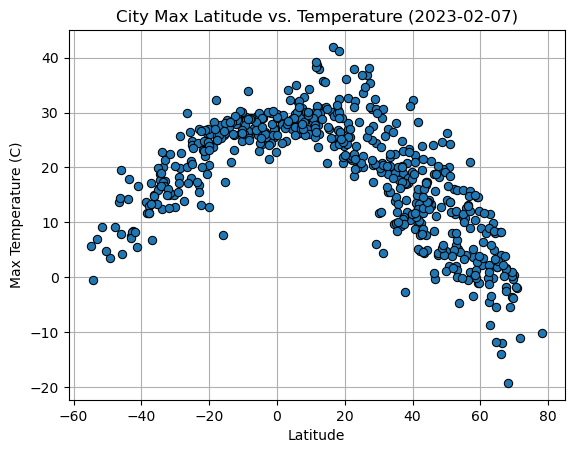

In [13]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

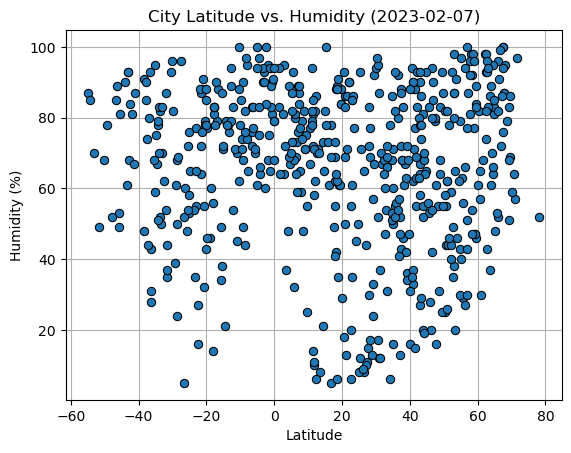

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"], 
         city_data_df["Humidity"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

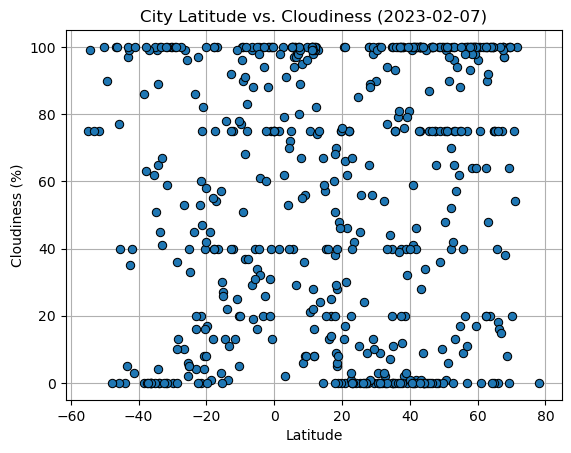

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

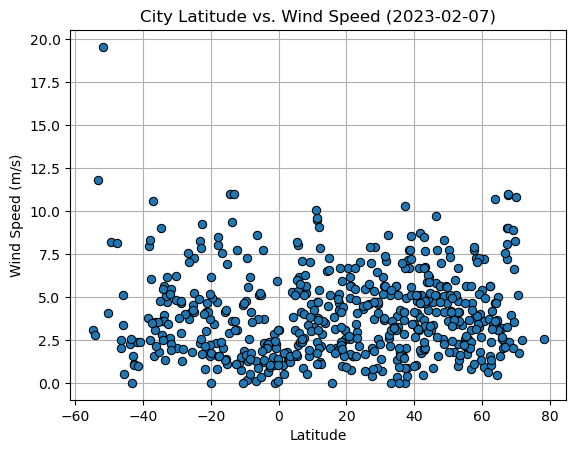

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sibut,5.7180,19.0739,35.04,32,97,2.22,CF,1683034517
2,yulinshi,38.2906,109.7494,20.76,42,76,7.14,CN,1683034517
3,bikenibeu village,1.3673,173.1241,27.98,83,75,1.03,KI,1683034517
6,abashiri,44.0213,144.2697,7.75,81,0,4.27,JP,1683034518
12,tura,25.5198,90.2201,22.12,71,56,0.68,IN,1683034519


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,opuwo,-18.0607,13.8400,32.35,14,13,4.70,NaN,1683034517
4,waitangi,-43.9535,-176.5597,14.34,90,0,2.24,NZ,1683034518
5,necochea,-38.5473,-58.7368,13.81,48,0,3.77,AR,1683034518
7,puerto natales,-51.7236,-72.4875,9.25,49,75,19.55,CL,1683034518
8,talcahuano,-36.7167,-73.1167,6.82,93,0,1.54,CL,1683034355


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7110997175570614


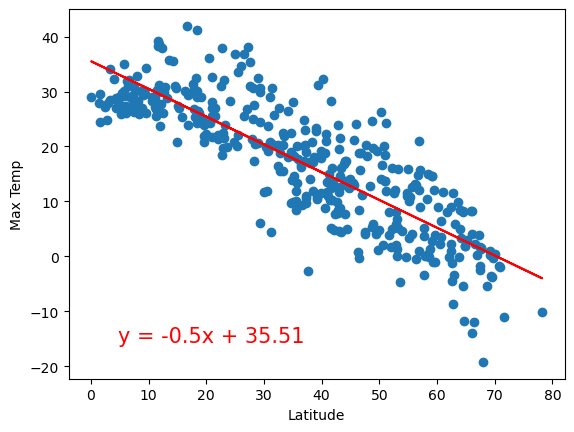

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)                         

The r-value is: 0.6945848168395018


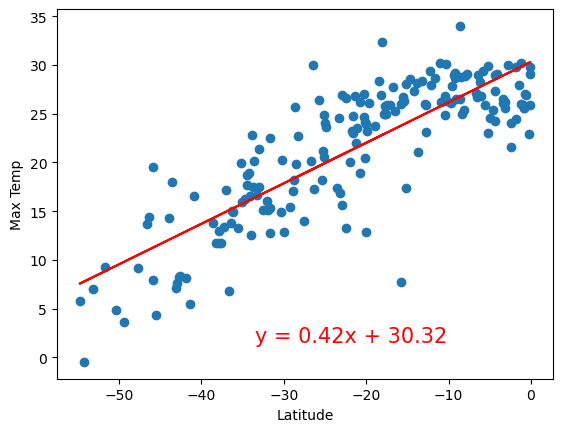

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.4, 0.1)

**Discussion about the linear relationship:Northern Hemisphere:

The relationship between latitude and max tempuratures displays a strong negative correlation.
The r-value is ~ 0.77 (rounded up)
Max temperature drops as the latitude increases.
Southern Hemisphere:

There is no correlation between latitude and max tempuratures
The r-value is ~ 0.16 (rounded up)

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.007863037774627966


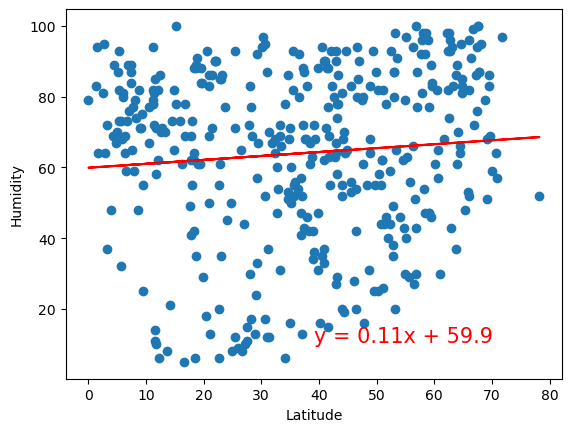

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

**Discussion about the linear relationship: 

There is no correlation between latitude and humidity
The r-value is ~ 0.18 (rounded up)
Southern Hemisphere:

There is no correlation between latitude and humidity
The r-value is ~ 0.1 (rounded up)

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.009083037066940008


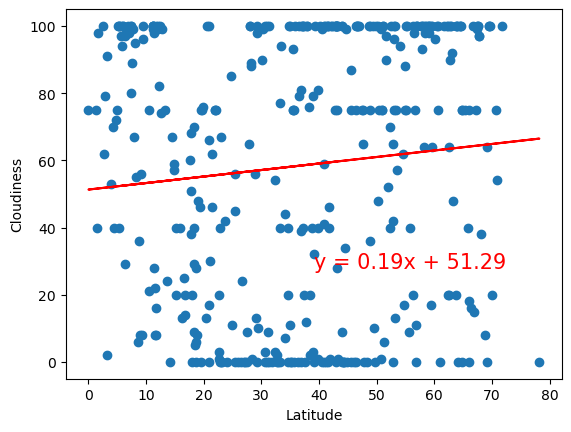

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.5, 0.3)

The r-value is: 0.0069862075678220606


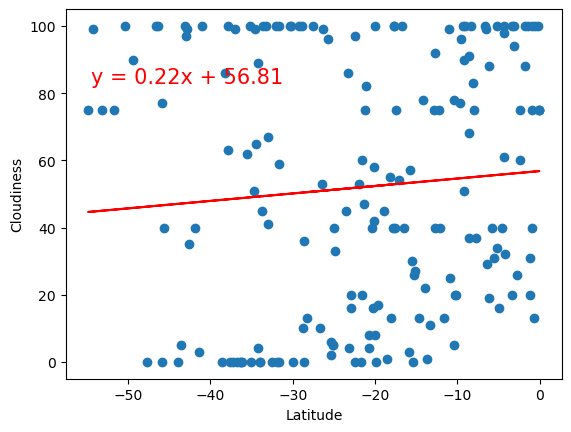

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 0.05, 0.8)

**Discussion about the linear relationship:

Northern Hemisphere:

There is no correlation between Latitude and Cloudliness
The r-value is ~ 0.05 (rounded up)
Southern Hemisphere:

There is no correlation between Latitude and Cloudliness
The r-value is ~ 0.19 (rounded up)

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.011350650492288662


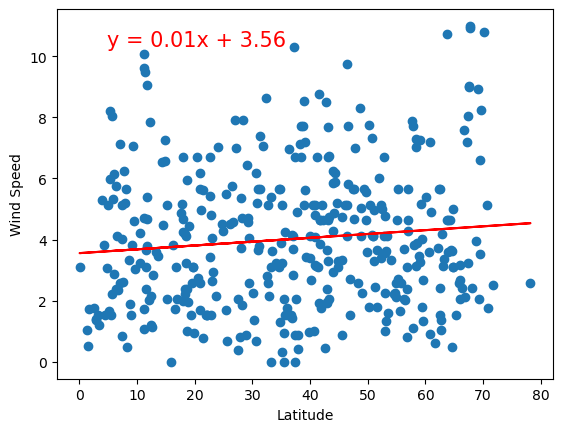

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values)

The r-value is: 0.06178135330144829


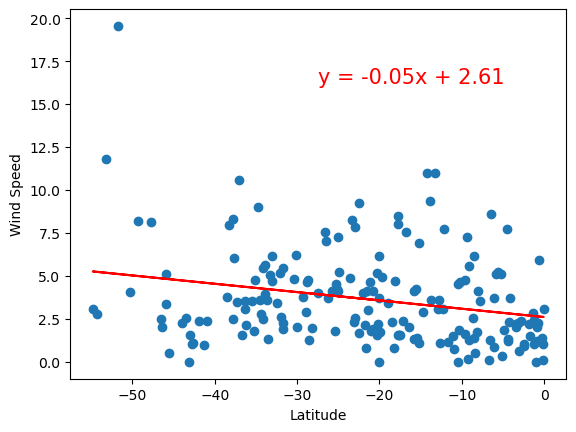

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 0.5, 0.8)

**Discussion about the linear relationship:

Northern Hemisphere:

There is no correlation between Latitude and Wind Speed
The r-value is ~ 0.01 (rounded up)
Southern Hemisphere:

There is no correlation between Latitude and Wind Speed
The r-value is ~ 0.09 (rounded up)